<a href="https://colab.research.google.com/github/pachterlab/GFCP_2021/blob/main/notebooks/occup_meas_sim_nonorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supplementary Figure 5: The RNA velocity count processing and inference workflow, applied to data generated by stochastic simulation (no normalization)

In this notebook, we simulate data from the $ABA$ topology, largely reproducing Figure 8. However, we omit normalization of the simulated data, and show that the imputation produces less bias relative to ground truth averages, at least at equilibrium. But note that the assumptions of _scVelo_ are violated: errors are state-dependent, species-dependent, and asymmetric.

# Dependencies and functions


In [ ]:
import time
t1 = time.time()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

In [ ]:
%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git

In [ ]:
%%capture
!pip install scanpy
!pip install umap-learn

In [ ]:
from vis import *

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


# Simulation

Generate simulation data.

In [ ]:
!mkdir -p data

In [ ]:
nCells,nGenes,T,tau,topo =  2000,100,10,[0,3,7],"aba"
name="data/simdata_aba"
meta = nCells,nGenes,T,tau,topo
simdata = simulate_occup_meas(nCells,nGenes,T,tau,topo,seed=42)
sim_export(simdata,meta,name)

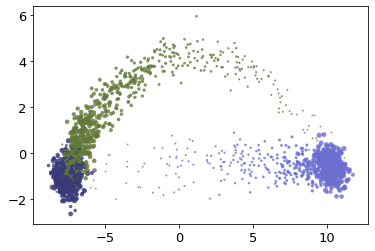

In [ ]:
vlm = vcy.VelocytoLoom(loom_filepath=name+".loom")
preprocess(vlm,sim=True,meta=meta,filter=False,sz_normalize=False)
fig,ax=plt.subplots(1,1,figsize=(6,4))
plotEmbed(ax,vlm,"ps",sim=True)

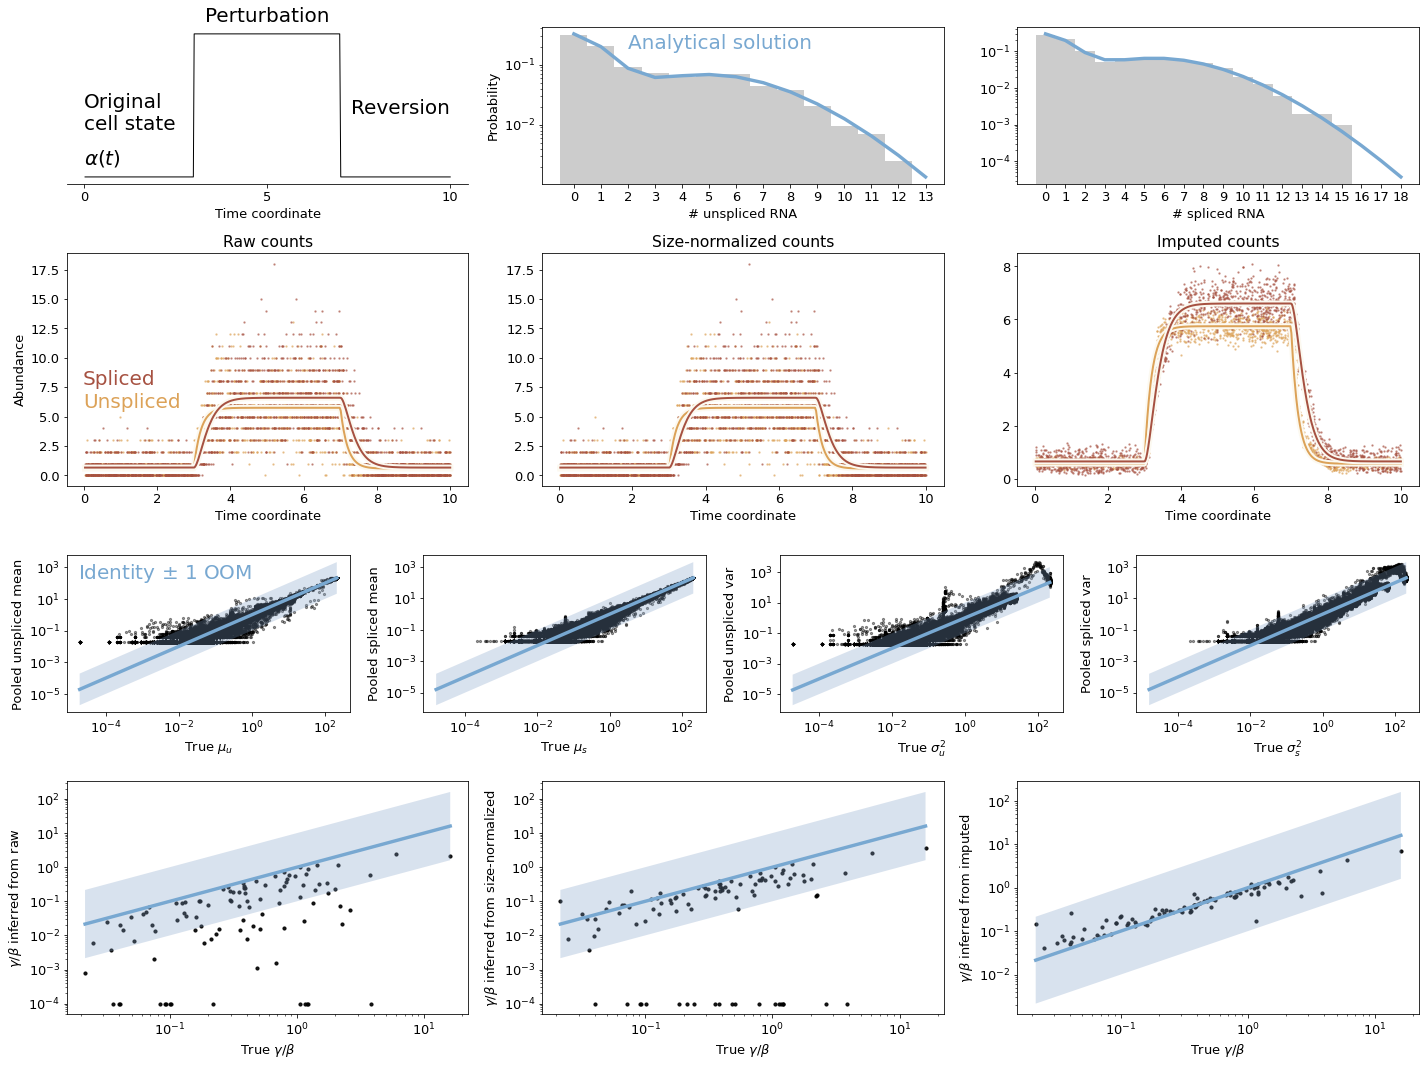

In [ ]:
fig=simValidPlots(vlm,tau,meta,geneind=2)
fig.tight_layout()

In [ ]:
!mkdir -p figure

In [ ]:
fig.savefig('figure/fig_aba_valid_nonorm_raw.png',dpi=600)

In [ ]:
t2 = time.time()
print('Notebook runtime: {:.1f} seconds.'.format(t2-t1))

Notebook runtime: 129.8 seconds.
